In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv("Olympic_Games_Medal_Tally.csv")

In [57]:
df.head()

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
0,1896 Summer Olympics,1,1896,United States,USA,11,7,2,20
1,1896 Summer Olympics,1,1896,Greece,GRE,10,18,19,47
2,1896 Summer Olympics,1,1896,Germany,GER,6,5,2,13
3,1896 Summer Olympics,1,1896,France,FRA,5,4,2,11
4,1896 Summer Olympics,1,1896,Great Britain,GBR,2,3,2,7


In [58]:
df.isnull().sum()

edition        0
edition_id     0
year           0
country        0
country_noc    0
gold           0
silver         0
bronze         0
total          0
dtype: int64

In [59]:
filtered_df = df[(df['year']>= 2000) & (df['gold'] > 20)]

In [60]:
filtered_df

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
837,2000 Summer Olympics,25,2000,United States,USA,37,24,32,93
838,2000 Summer Olympics,25,2000,Russian Federation,RUS,32,28,29,89
839,2000 Summer Olympics,25,2000,People's Republic of China,CHN,28,16,14,58
917,2004 Summer Olympics,26,2004,United States,USA,36,39,26,101
918,2004 Summer Olympics,26,2004,People's Republic of China,CHN,32,17,14,63
919,2004 Summer Olympics,26,2004,Russian Federation,RUS,28,26,36,90
991,2008 Summer Olympics,53,2008,People's Republic of China,CHN,48,22,30,100
992,2008 Summer Olympics,53,2008,United States,USA,36,39,37,112
993,2008 Summer Olympics,53,2008,Russian Federation,RUS,24,13,23,60
1078,2012 Summer Olympics,54,2012,United States,USA,48,26,30,104


In [61]:
df_sorted = filtered_df.sort_values(by=['year', 'gold'], ascending=[True, False])

In [62]:
df_sorted

,edition,edition_id,year,country,country_noc,gold,silver,bronze,total
837,2000 Summer Olympics,25,2000,United States,USA,37,24,32,93
838,2000 Summer Olympics,25,2000,Russian Federation,RUS,32,28,29,89
839,2000 Summer Olympics,25,2000,People's Republic of China,CHN,28,16,14,58
917,2004 Summer Olympics,26,2004,United States,USA,36,39,26,101
918,2004 Summer Olympics,26,2004,People's Republic of China,CHN,32,17,14,63
919,2004 Summer Olympics,26,2004,Russian Federation,RUS,28,26,36,90
991,2008 Summer Olympics,53,2008,People's Republic of China,CHN,48,22,30,100
992,2008 Summer Olympics,53,2008,United States,USA,36,39,37,112
993,2008 Summer Olympics,53,2008,Russian Federation,RUS,24,13,23,60
1078,2012 Summer Olympics,54,2012,United States,USA,48,26,30,104


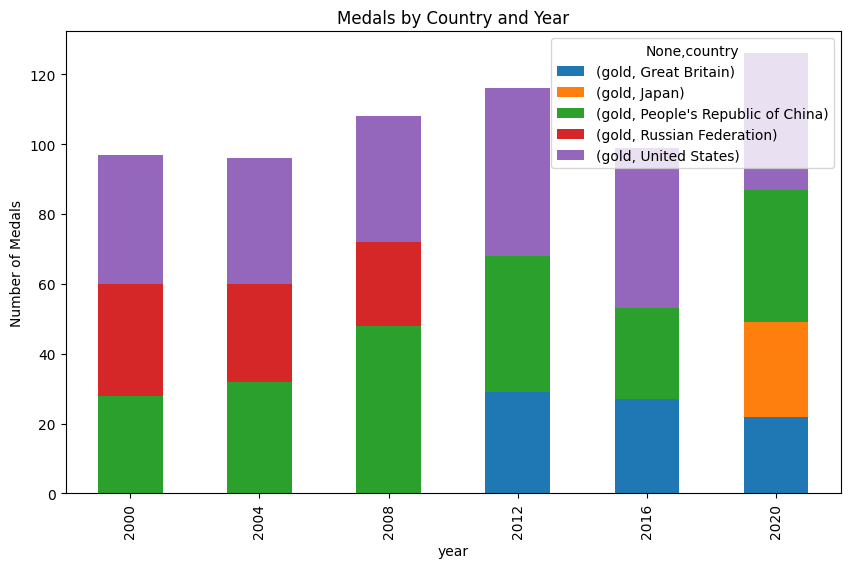

In [64]:
df_filtered = df.sort_values(by=['year', 'gold'], ascending=[True, False])

# Group by 'year' and 'country' and sum the medal counts
grouped = df_sorted.groupby(['year', 'country']).sum()[['gold']]

# Unstack to get 'country' as columns
grouped.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Medals by Country and Year')
plt.ylabel('Number of Medals')
plt.show()